# Meta Llama 3.1 405B Instruct with v2.26 v2 prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.1 405B Instruct with prompt from 2/26/25 v2.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import llama_instructions_v226_v2
MODEL_ID = "meta.llama3-1-405b-instruct-v1:0"
SYSTEM_PROMPT = llama_instructions_v226_v2

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:root:Completed: 3
INFO:root:Completed: 2
INFO:root:Completed: 0
INFO:root:Completed: 4
INFO:root:Completed: 1
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 11
INFO:root:Completed: 12
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 16
INFO:root:Completed: 15
INFO:root:Completed: 17
INFO:root:Completed: 18
INFO:root:Completed

CPU times: user 1min 9s, sys: 6.14 s, total: 1min 15s
Wall time: 43min 19s


[{'0004.91306_cites_88240.txt': {'model': 'meta.llama3-1-405b-instruct-v1:0',
   'input_tokens': 4902,
   'output_tokens': 110,
   'prediction': 'no',
   'confidence': 0.85,
   'rationale': 'The Acting Case discusses and questions the Target Case, but it does not explicitly or implicitly overrule it. The Acting Case limits and distinguishes the Target Case, but it does not take any Negative Actions that would render the Target Case invalid.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Texas v. Hardenberg',
   'raw_results': '\n\n```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Texas v. Hardenberg",\n  "overruled": "no",\n  "confidence": 0.85,\n  "rationale": "The Acting Case discusses and questions the Target Case, but it does not explicitly or implicitly overrule it. The Acting Case limits and distinguishes the Target Case, but it does not take any Negative Action

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,4902,110,no,0.85,The Acting Case discusses and questions the Ta...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n\n```json\n{\n ""instructions"": ""Determine w..."
1,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,3358,153,no,0.92,The Acting Case references and reaffirms the r...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n\n```json\n{\n ""instructions"": ""Determine w..."
2,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,5752,125,yes,0.92,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n\n```json\n{\n ""instructions"": ""Determine w..."
3,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,4815,123,no,0.85,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n\n```json\n{\n ""instructions"": ""Determine w..."
4,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,4281,137,no,0.92,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n\n```json\n{\n ""instructions"": ""Determine w..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/2.llama/1.llama31_405B_v226_v2_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/2.llama/1.llama31_405B_v226_v2_prompt.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,5752,125,yes,0.92,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n\n```json\n{\n ""instructions"": ""Determine w..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,4281,137,no,0.92,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n\n```json\n{\n ""instructions"": ""Determine w..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,3358,153,no,0.92,The Acting Case references and reaffirms the r...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n\n```json\n{\n ""instructions"": ""Determine w..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,4902,110,no,0.85,The Acting Case discusses and questions the Ta...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n\n```json\n{\n ""instructions"": ""Determine w..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,4815,123,no,0.85,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n\n```json\n{\n ""instructions"": ""Determine w..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     874
yes    210
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

6023790

In [15]:
eval_df["output_tokens"].sum()

153099

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.92      0.95       935
         Yes       0.62      0.88      0.73       149

    accuracy                           0.91      1084
   macro avg       0.80      0.90      0.84      1084
weighted avg       0.93      0.91      0.92      1084



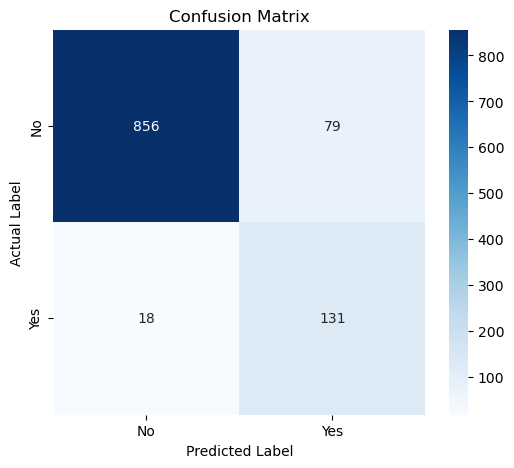

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.91
Precision: 0.62
Recall: 0.88
F-score: 0.73
Specificity: 0.92
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 131
True negatives: 856
False positives: 79
False negatives: 18


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

79

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

18

# Save the evaluation df

In [22]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,5752,125,yes,0.92,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n\n```json\n{\n ""instructions"": ""Determine w..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,4281,137,no,0.92,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n\n```json\n{\n ""instructions"": ""Determine w..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,3358,153,no,0.92,The Acting Case references and reaffirms the r...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n\n```json\n{\n ""instructions"": ""Determine w..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,4902,110,no,0.85,The Acting Case discusses and questions the Ta...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n\n```json\n{\n ""instructions"": ""Determine w..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,4815,123,no,0.85,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n\n```json\n{\n ""instructions"": ""Determine w..."


In [23]:
eval_df.to_csv("predictions/2.llama/1.llama31_405B_v226_v2_prompt_eval.csv", index=False)